### In this notebook we recreate the results from Avellenada and Stoikov's paper "High Frequency Trading in a Limit Order Book"

We use the same parameters as described in the paper

In [8]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [127]:
# PARAMS
sigma = 2 # Stock diffusion
gamma = 0.1 # Util function param
A, k = 140, 1.5 # Order fill arrival intensity
s0 = 100

# SIM
T = 1 # Terminal time
N = 10_000 # Number of stock paths
dt = 0.005 # Time step

In [128]:
def intensity(delta):
    return A * math.exp(-k*delta)

In [133]:
random.seed(67)

q = 0 # Inventory variable
cash = 0
# NOTE: Spread variable denotes spread around the reservation price
reservation_price = s0
spread = gamma * (sigma**2) * (T) + 2/gamma * math.log(1 + gamma/k) # Set the initial spread from time t=0
# NOTE: bid_spread and ask_spread refer to spreads from the actual stock price NOT the reservation
bid_spread = spread/2
ask_spread = spread/2
t = dt # Initial time
s = s0

# To track development
stock_path = [s]
q_path = [q]
reservation_price_path = [reservation_price]
cash_path = [cash]
ask_path = [ask_spread]
bid_path = [bid_spread]

# The trading simulator
while t <= T:

    # Check if order filled
    # The ask
    if random.uniform(0,1) < intensity(ask_spread)*dt:
        # Ask is filled
        q -= 1
        cash += s

    # The bid
    if random.uniform(0,1) < intensity(bid_spread)*dt:
        q += 1
        cash -= s
    
    # Stock moves
    s += random.normalvariate()*math.sqrt(dt)*sigma

    # Set spread
    spread = gamma * (sigma**2) * (T-t) + 2/gamma * math.log(1 + gamma/k)
    reservation_price = s - q * gamma * (sigma**2) * (T-t)
    ask_spread = (reservation_price + spread/2) - s
    bid_spread = s - (reservation_price - spread/2)

    # Bookkeeping
    ask_path.append(ask_spread)
    bid_path.append(bid_spread)
    stock_path.append(s)
    q_path.append(q)
    reservation_price_path.append(reservation_price)
    cash_path.append(cash)

    # Step forward in time
    t += dt

In [134]:
print(f'Cash: {cash} and final inventory: {q}')
print(f'PnL: {cash + q*s}')

Cash: -103.20565826305895 and final inventory: 1
PnL: -2.2308405783171708


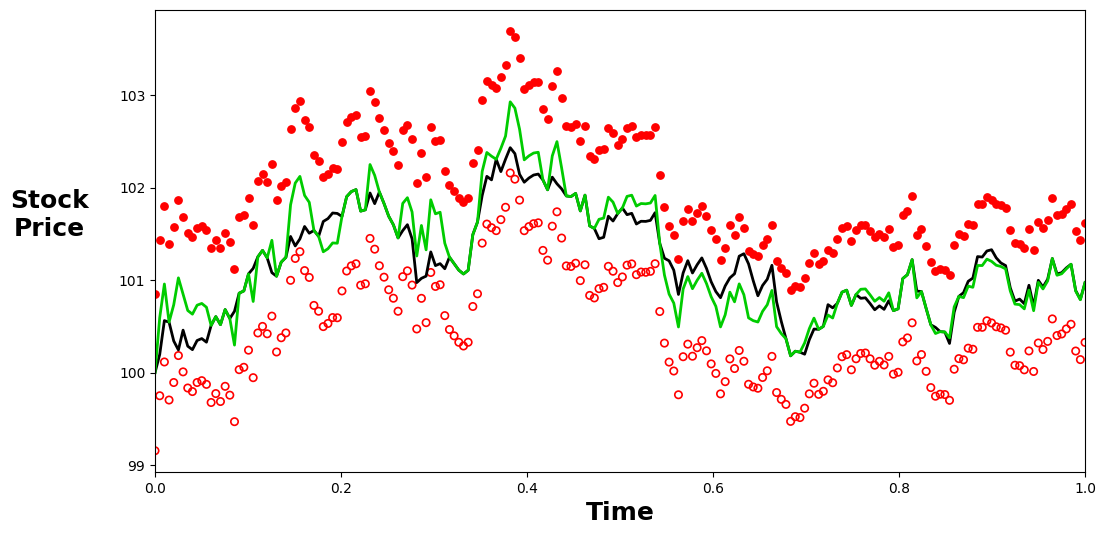

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
tt = np.linspace(0.0, 1.0, 200)
# Lines
ax.plot(tt, stock_path, color="black", lw=2.0, label="Mid–market price")
ax.plot(tt, reservation_price_path, color="#00cc00", lw=2.0, label="Indifference Price")

# Spreads as red dots
ax.scatter(tt, np.array(ask_path) + np.array(stock_path), s=28, c="red", edgecolors="red", linewidths=1.0, label="Price asked")
ax.scatter(
    tt,
    np.array(stock_path) - np.array(bid_path),
    s=28,
    facecolors="none",
    edgecolors="red",
    linewidths=1.2,
    label="Price bid",
)

# Labels and limits
ax.set_xlabel("Time", fontsize=18, fontweight="bold")
ax.set_ylabel("Stock\nPrice", fontsize=18, fontweight="bold", rotation=0, labelpad=50)

ax.set_xlim(0.0, 1.0)
ax.margins(y=0.05)